# Visitor Prediction in the Library of buisness administration (BWI)

**Lecture:** Selected Topics in AI<br>
**Lecturer:** Prof. Dr. Johannes Maucher

**Group:**
- Firaz ...
- Patryk Gadziomski

<div style="width: 100%; height: 30px; background-color:red"></div>

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
from meteostat import Point, Daily
from datetime import datetime
import seaborn as sns

In [4]:
# Read excel file as dataframe: visitor_data
visitor_data = pd.read_excel("data/Visitor_Forecast.xlsx")
visitor_data.iloc[:5, :]

,date,09:30:00,10:45:00,13:45:00,16:15:00,17:45:00,18:30:00
0,2023-10-26,0.0,4.0,12.0,6.0,7.0,0.0
1,2023-10-27,2.0,1.0,2.0,2.0,NaN,NaN
2,2023-10-30,1.0,2.0,7.0,3.0,5.0,2.0
3,2023-10-31,3.0,7.0,18.0,4.0,4.0,2.0
4,2023-11-02,1.0,7.0,6.0,7.0,NaN,NaN


In [5]:
visitor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      24 non-null     datetime64[ns]
 1   09:30:00  22 non-null     float64       
 2   10:45:00  23 non-null     float64       
 3   13:45:00  23 non-null     float64       
 4   16:15:00  23 non-null     float64       
 5   17:45:00  17 non-null     float64       
 6   18:30:00  16 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.4 KB


In [6]:
visitor_data.columns = [str(column) for column in visitor_data.columns]
visitor_data.columns

Index(['date', '09:30:00', '10:45:00', '13:45:00', '16:15:00', '17:45:00',
       '18:30:00'],
      dtype='object')

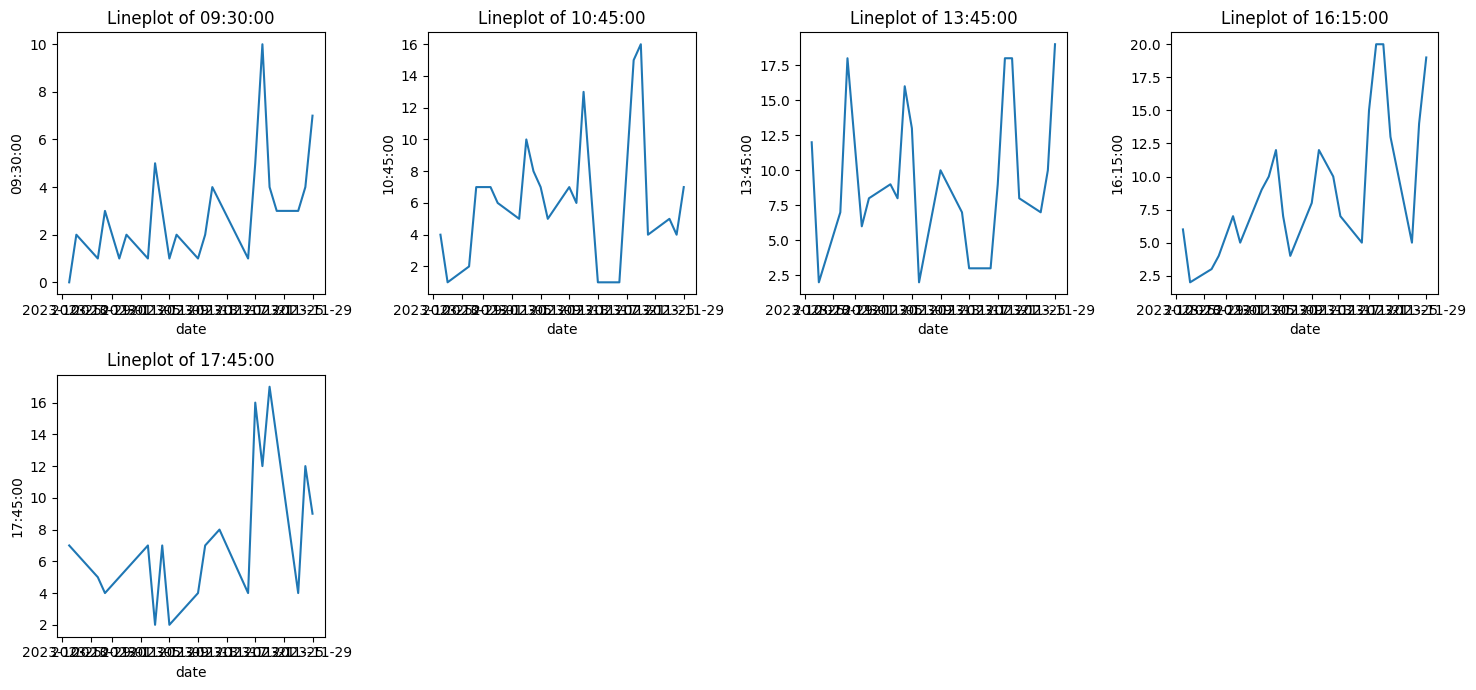

In [7]:
# Visualize the times
plt.figure(figsize=(15, 7))

category = ['09:30:00', '10:45:00', '13:45:00', '16:15:00', '17:45:00']
total_subplots = len(category)

rows = (total_subplots // 4) + 1
cols = min(total_subplots, 4)

for i, col in enumerate(category):
    plt.subplot(rows, cols, i + 1)
    sns.lineplot(y=visitor_data[col], x=visitor_data["date"])
    plt.title(f'Lineplot of {col}')

plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.show()

# Becasue of the missing values, we have a lot of gaps/random zeros

In [8]:
# add column "weekday"
# fill "weekday" with weekdays in relation to the date
days = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"] 
visitor_data["weekday"] = [days[weekday] for weekday in visitor_data["date"].dt.dayofweek]
visitor_data

,date,09:30:00,10:45:00,13:45:00,16:15:00,17:45:00,18:30:00,weekday
0,2023-10-26,0.0,4.0,12.0,6.0,7.0,0.0,thursday
1,2023-10-27,2.0,1.0,2.0,2.0,NaN,NaN,friday
2,2023-10-30,1.0,2.0,7.0,3.0,5.0,2.0,monday
3,2023-10-31,3.0,7.0,18.0,4.0,4.0,2.0,tuesday
4,2023-11-02,1.0,7.0,6.0,7.0,NaN,NaN,thursday
5,2023-11-03,2.0,6.0,8.0,5.0,NaN,NaN,friday
6,2023-11-06,1.0,5.0,9.0,9.0,7.0,4.0,monday
7,2023-11-07,5.0,10.0,8.0,10.0,2.0,1.0,tuesday
8,2023-11-08,3.0,8.0,16.0,12.0,7.0,3.0,wednesday
9,2023-11-09,1.0,7.0,13.0,7.0,2.0,2.0,thursday


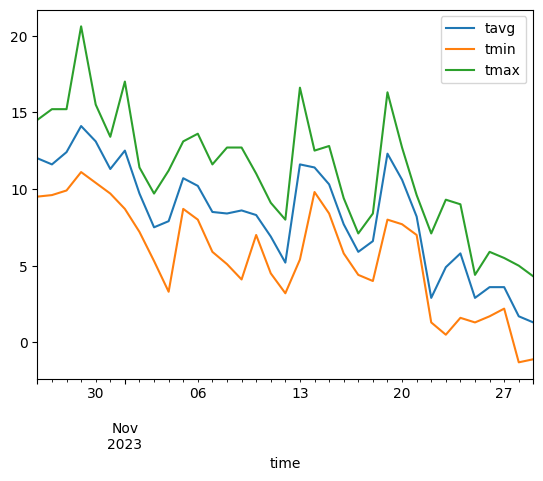

In [9]:
# get weather data thorught the date
start = datetime(2023, 10, 26)
end = datetime(2023, 11, 29)

# Stuttgart
location = Point(48.7823200, 9.1770200, 252)

weather_data = Daily(location, start, end)
weather_data = weather_data.fetch()

"""
time: The date string (format: YYYY-MM-DD)      : String
tavg: The average air temperature in °C         : Float
tmin: The minimum air temperature in °C         : Float
tmax: The maximum air temperature in °C	        : Float
prcp: The daily precipitation total in mm       : Float
snow: The maximum snow depth in mm	            : Integer
wdir: The average wind direction in degrees (°)	: Integer
wspd: The average wind speed in km/h	        : Float
wpgt: The peak wind gust in km/h	            : Float
pres: The average sea-level air pressure in hPa	: Float
tsun: The daily sunshine total in minutes (m)	: Integer
"""
weather_data

weather_data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [10]:
# merge data frames
joined_df = visitor_data.merge(
    weather_data,
    left_on="date",
    right_on="time"
)

joined_df

,date,09:30:00,10:45:00,13:45:00,16:15:00,17:45:00,18:30:00,weekday,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2023-10-26,0.0,4.0,12.0,6.0,7.0,0.0,thursday,12.0,9.5,14.5,8.6,0.0,189.0,8.3,26.3,997.5,44.0
1,2023-10-27,2.0,1.0,2.0,2.0,NaN,NaN,friday,11.6,9.6,15.2,2.8,0.0,202.0,10.8,41.8,997.1,247.0
2,2023-10-30,1.0,2.0,7.0,3.0,5.0,2.0,monday,13.1,10.4,15.5,10.3,0.0,138.0,7.6,25.2,1003.0,213.0
3,2023-10-31,3.0,7.0,18.0,4.0,4.0,2.0,tuesday,11.3,9.7,13.4,1.0,0.0,231.0,8.6,31.0,1006.8,59.0
4,2023-11-02,1.0,7.0,6.0,7.0,NaN,NaN,thursday,9.7,7.2,11.4,4.6,0.0,163.0,14.0,38.2,991.9,0.0
5,2023-11-03,2.0,6.0,8.0,5.0,NaN,NaN,friday,7.5,5.3,9.7,1.1,0.0,220.0,10.4,29.9,991.7,0.0
6,2023-11-06,1.0,5.0,9.0,9.0,7.0,4.0,monday,10.2,8.0,13.6,3.3,0.0,212.0,11.9,42.8,1008.0,239.0
7,2023-11-07,5.0,10.0,8.0,10.0,2.0,1.0,tuesday,8.5,5.9,11.6,0.4,0.0,209.0,12.2,39.6,1015.5,66.0
8,2023-11-08,3.0,8.0,16.0,12.0,7.0,3.0,wednesday,8.4,5.1,12.7,0.0,0.0,203.0,11.5,40.3,1017.8,260.0
9,2023-11-09,1.0,7.0,13.0,7.0,2.0,2.0,thursday,8.6,4.1,12.7,1.3,0.0,181.0,14.0,43.9,1008.8,0.0
